<a href="https://colab.research.google.com/github/nurulafii/Project-Akhir-Kelompok4/blob/main/Project_Akhir_Kel_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT AKHIR AI: CHATBOT**

**Anggota Kelompok 4 :**

**Al Murtadho**

**Anggito Abimanyu**

**Dicky Yonsi Pratama**

**Nurul Afiyah**

**Vahira Anggraini**

# **PROJECT CHATBOT PEMESANAN DI RESTORAN**

---








## PROBLEM SCOPING

Tahapan pertama sebelum melakukan eksplorasi dan praproses pada data adalah memasukan library yang akan digunakan untuk menganalisa dataset dengan menggunakan metode Deep Learning seperti Neural Network dalam pengolahan teks, Chatbot dll. Library yang saya gunakan yaitu NumPy untuk komputasi matematika, Matplotlib untuk visualisasi model data, Natural Language Toolkit atau NLTK untuk pengolahan teks, Pandas untuk membaca data, serta Tensorflow untuk model pada data menggunakan algoritma LSTM dan Jaringan Syaraf Tiruan (Neural Network).

**Load GDrive**

Pertama kita melakukan load Gdrive dengan menggunakan codingan "drive.mount" dimana akan meminta menghubungkan ke drive pengguna atau user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Install Library**

 Pada proyek AI Chatbot membutuhkan package library yaitu **Speech Recognition** dan **Google Text To Speech** yang harus di install.

In [ ]:
!pip -q install speechrecognition

     |████████████████████████████████| 32.8 MB 119 kB/s 


**Notes : Penginstalan dengan tanda -q maksudnya adalah mode quiet atau diam sehingga tidak mengeluarkan output saat eksekusi** 

In [ ]:
!pip -q install gtts

# **Import Library**

Tahapan pertama sebelum melakukan eksplorasi dan praproses pada data adalah memasukan library yang akan digunakan untuk menganalisa dataset dengan menggunakan metode Deep Learning seperti Neural Network dalam pengolahan teks, Chatbot dll. Library yang saya gunakan yaitu NumPy untuk komputasi matematika, Matplotlib untuk visualisasi model data, Natural Language Toolkit atau NLTK untuk pengolahan teks, Pandas untuk membaca data, serta Tensorflow untuk model pada data menggunakan algoritma LSTM dan Jaringan Syaraf Tiruan (Neural Network).

In [ ]:
# Import Libraries
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from gtts import gTTS
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import speech_recognition as sr 
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# DATA ACQUISITION

Setelah import library, tahapan selanjutnya adalah me-load dataset yang telah disediakan. Dataset yang digunakan berupa format .json yang sangat cocok untuk membuat model Chatbot.

Data Json merupakan data yang termasuk dalam semi structured yang dimana data ini menampung beberapa bagian data seperti tag, pattern, context, dan response. Data yang dipakai dalam proyek ini menggunakan dataset manual yang diciptakan oleh **kelompok 4** tentang Chatbot Sistem order restoran Kim Chi
Untuk dataset Json yang kami gunakan adalah **Restoran Arabic NurvAlbiky** Untuk datasetnya terlengkap

In [ ]:
# Importing the dataset
with open('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir/restoran nurvalbiky.json') as content:
  data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata 
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [ ]:
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
5,hy,greeting
6,pagi,greeting
7,morning,greeting
8,siang,greeting
9,afternoon,greeting


In [ ]:
data.head(17)

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
5,hy,greeting
6,pagi,greeting
7,morning,greeting
8,siang,greeting
9,afternoon,greeting


In [ ]:
data.tail(18)

,patterns,tags
42,saya mau pesan canay bread juga ya?,minuman_&_deseart
43,saya mau pesan ayran sama safron milk,minuman_&_deseart
44,sama ini saya mau pesan cokelat unta juga,minuman_&_deseart
45,"saya mau pesan coklat unta dan esh asarya, sa...",minuman_&_deseart
46,bayar dimana?,pembayaran_restoran_NurvAlbiky
47,bayar bisa melalui apa saja?,pembayaran_restoran_NurvAlbiky
48,Dah,goodbye
49,Dadah,goodbye
50,Bye,goodbye
51,Byee,goodbye


Data yang telah kita miliki dalam format JSON yang dapat digunakan melalui pandas dengan cara konversi. Data JSON yang saya miliki didapat dengan cara manual dengan mengambil data restoran NurvAlbiky.Json

# DATA EXPLORATION

# **Preprocessing The Data**

---



Setelah kita meload data dan mengonversi data json menjadi dataframe. Tahapan selanjutnya adalah praproses pada dataset yang kita gunakan saat ini yaitu dengan cara:

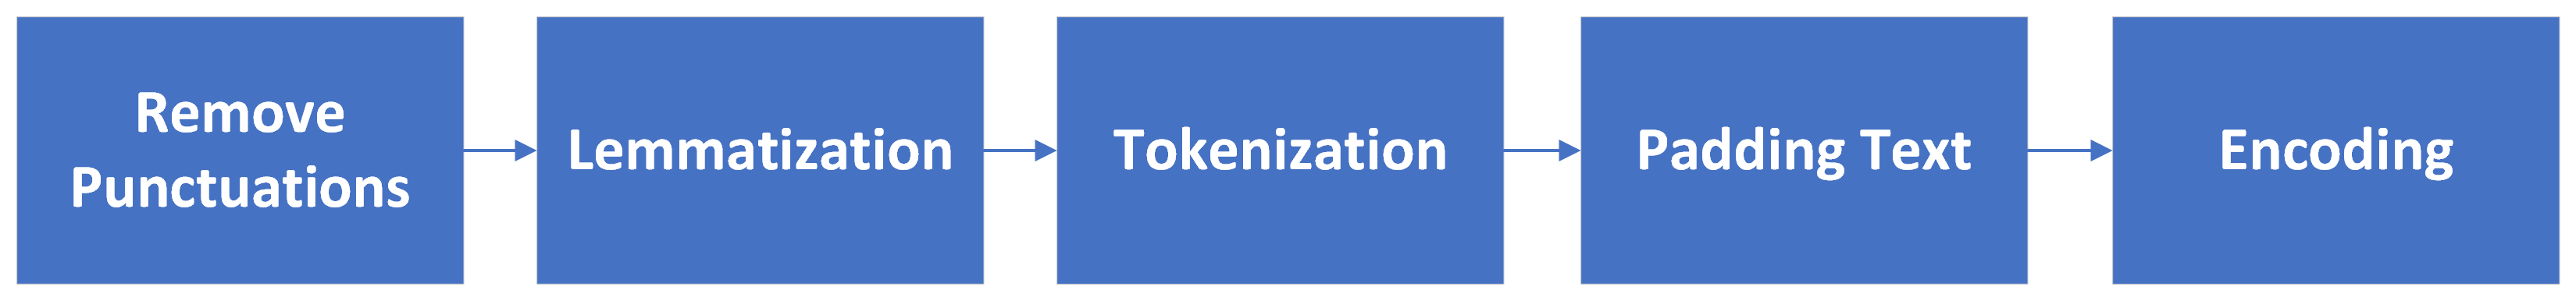

1.   Remove Punctuations (Menghapus Punktuasi)
2.   Lematization (Lematisasi)
3.   Tokenization (Tokenisasi)
4.   Apply Padding (Padding)
5.   Encoding the Outputs (Konversi Keluaran Enkoding)

Kelima tahapan pemrosesan teks ini dijelaskan pada bagian langkah selanjutnya.

# **Menghapus Punktuasi**
Tahapan praproses pada data teks yang pertama adalah menghapus punktuasi atau tanda baca seperti special character yaitu '!' (tanda seru) ',' (tanda koma) '.' (tanda titik sebagai berhenti) '?' (tanda tanya) dan tanda baca yang lain. Tahapan ini gunanya agar memudahkan kita dalam melakukan pemrosesan data teks yang akan kita olah.

In [ ]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
5,hy,greeting
6,pagi,greeting
7,morning,greeting
8,siang,greeting
9,afternoon,greeting


# **Lemmatization**

Setelah menghapus punktuasi atau tanda baca, tahapan selanjutnya yaitu Lematisasi atau Lemmatization. 
Lematisasi atau Lemmatization adalah proses dimana merujuk pada melakukan sesuatu menggunakan vocabulary atau kosakata dan analisis morfologi kata-kata untuk menghilangkan inflectional endings only dan untuk mengembalikan bentuk dictionary (kata dalam kamus) dari sebuah kata yang dikenal sebagai lemma. Adapun

Contoh Lematisasi : Menggunakan (Kata Imbuhan) -> Guna (Kata Dasar)

Dalam contoh berikut proses lematisasi awalnya data teks menggunakan kata imbuhan yaitu Menggunakan dimana meng- + guna (kata dasar yang berawalan vokal g) + kan (sebagai akhiran) diubah menjadi kata dasar yaitu 'Guna'.

Proses ini dimana menghilangkan Prefiks pada imbuhan (Meng-) dan Suffiks pada (-kan).

In [ ]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

85 unique lemmatized words [',', 'a', 'ada', 'afternoon', 'apa', 'arabian', 'asarya', 'ayran', 'bai', 'bayar', 'best', 'bisa', 'bread', 'bro', 'bye', 'byee', 'canay', 'chicken', 'coffe', 'cokelat', 'coklat', 'dadah', 'dah', 'dan', 'day', 'di', 'didirikannya', 'dimana', 'esh', 'evening', 'gitu', 'good', 'hai', 'hallo', 'halo', 'have', 'hei', 'hi', 'hindi', 'hy', 'ini', 'itu', 'juga', 'jumpa', 'kabuli', 'kalo', 'kawan', 'lamb', 'macthbous', 'malam', 'mandhi', 'mau', 'melalui', 'menu', 'milk', 'morning', 'nice', 'nurvalbiky', 'ok', 'oke', 'p', 'pagi', 'permisi', 'pesan', 'restoran', 'safron', 'saja', 'sama', 'sampai', 'saya', 'see', 'selamat', 'seller', 'shawarma', 'si', 'siang', 'sore', 'tabbouleh', 'tamer', 'tinggal', 'tujuan', 'unta', 'ya', 'yang', 'you']


**Di tahap selanjutnya adalah data kelas yang bentuknya "Tags"**

In [ ]:
# sort classes
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

9 classes ['Menu_Restoran_NurvAlbiky', 'Menu_best_seller_Restoran_NurvAlbiky', 'goodbye', 'greeting', 'menu_makanan', 'minuman_&_deseart', 'pembayaran_restoran_NurvAlbiky', 'penjelasan_Restoran_NurvAlbiky', 'tujuan_Restoran_NurvAlbiky']


### **Selanjutnya adalah mencari Jumlah dari Keseluruhan Data Teks**

In [ ]:
# documents = combination between patterns and intents
print (len(documents), "documents")

856 documents


# **Tokenization (Tokenisasi)**
Setelah proses lematisasi dan mencari tahu data classes dan jumlah keseluruhan data patterns dengan intents-nya. Maka, tahapan selanjutnya proses tokenisasi. Tokenisasi adalah suatu proses memberikan urutan karakter dan sebuah unit dokumen terdefinisi. Tokenisasi juga merupakan tugas untuk memecah kalimat menjadi bagian-bagian yang disebut dengan 'Token' dan menghilangkan bagian tertentu seperti tanda baca.

Contohnya: **Apa itu Restoran Arabic NurvAlbiky -> 'Apa' 'itu' 'Restoran' 'Arabic' 'NurvAlbiky'**

In [ ]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [4, 49, 5, 6],
 [4, 50, 51, 5, 6],
 [],
 [4, 13, 14, 52, 53, 15, 5, 6],
 [4, 14, 54, 55, 15, 5, 6],
 [1, 2, 3, 16],
 [1, 2, 3, 17],
 [1, 2, 3, 18],
 [1, 2, 3, 7, 8],
 [1, 2, 3, 9, 8],
 [1, 2, 3, 7, 10],
 [1, 2, 3, 9, 10],
 [1, 2, 3, 19, 20],
 [1, 2, 3, 21],
 [1, 2, 3, 56, 57],
 [1, 2, 3, 11, 12],
 [1, 2, 3, 22, 23],
 [24, 25, 1, 2, 3, 16],
 [24, 25, 1, 2, 3, 17],
 [1, 2, 3, 18],
 [1, 2, 3, 7, 8],
 [1, 2, 3, 9, 8],
 [1, 2, 3, 7, 10],
 [1, 2, 3, 9, 10],
 [1, 2, 3, 19, 20, 26, 58],
 [1, 2, 3, 21, 27, 11, 12],
 [27, 59, 1, 2, 3, 60, 28, 26],
 [1, 2, 3, 61, 28, 62, 63, 64, 11, 12, 22, 23],
 [29, 65],
 [29, 66, 67, 4, 13],
 [68],
 [69],
 [30],
 [70],
 [71, 30],
 [72, 73],
 [74, 75],
 [76],
 [77, 78],
 [79],
 [80],
 [81, 82, 83, 84]]

# **Padding**
Setelah memproses tokenisasi yang dimana memecah kalimat menajdi bagian-bagian yang disebut token yang digunakan untuk mengolah data teks pada AI Chatbot maka tahapan selanjutnya adalah Padding. Apa itu Padding?

Padding adalah Suatu proses untuk mengubah setiap sequence agar memiliki panjang yang sama. Pada padding, setiap sequence dibuat sama panjang dengan menambahkan nilai 0 secara suffiks atau prefiks hingga mencapai panjang maksimum sequence. Selain itu padding juga dapat memotong sequence hingga panjangnya sesuai dengan panjang maksimum sequence.

Padding juga adalah proses untuk membuat setiap kalimat pada teks memiliki panjang yang seragam. Sama seperti melakukan resize gambar, agar resolusi setiap gambar sama besar. Untuk menggunakan padding bisa impor library pad_sequence. Kemudian buat panggil fungsi pad_sequence() dan masukkan sequence hasil tokenisasi sebagai parameternya.

Contohnya: sequences_samapanjang = pad_sequences(sequences)

Yang nantinya akan dikeluarkan menjadi angka dengan awalan 0 seperti gambar dibawah ini.

In [ ]:
# Apply padding 
x_train = pad_sequences(train)

# Encoding the outputs 
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [ ]:
print(x_train) # Padding Sequences

[[ 0  0  0  0  0  0  0  0  0  0  0 31]
 [ 0  0  0  0  0  0  0  0  0  0  0 32]
 [ 0  0  0  0  0  0  0  0  0  0  0 33]
 [ 0  0  0  0  0  0  0  0  0  0  0 34]
 [ 0  0  0  0  0  0  0  0  0  0  0 35]
 [ 0  0  0  0  0  0  0  0  0  0  0 36]
 [ 0  0  0  0  0  0  0  0  0  0  0 37]
 [ 0  0  0  0  0  0  0  0  0  0  0 38]
 [ 0  0  0  0  0  0  0  0  0  0  0 39]
 [ 0  0  0  0  0  0  0  0  0  0  0 40]
 [ 0  0  0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0  0  0 42]
 [ 0  0  0  0  0  0  0  0  0  0  0 43]
 [ 0  0  0  0  0  0  0  0  0  0  0 44]
 [ 0  0  0  0  0  0  0  0  0  0  0 45]
 [ 0  0  0  0  0  0  0  0  0  0  0 46]
 [ 0  0  0  0  0  0  0  0  0  0  0 47]
 [ 0  0  0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  4 49  5  6]
 [ 0  0  0  0  0  0  0  4 50 51  5  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 13 14 52 53 15  5  6]
 [ 0  0  0  0  0  4 14 54 55 15  5  6]
 [ 0  0  0  0  0  0  0  0  1  2  3 16]
 [ 0  0  0  0  0  0  0  0  1  2  3 17]
 [ 0  0  0  0  0  0  0  0

Hasil setelah padding adalah setiap sequence memiliki panjang yang sama. Padding dapat melakukan ini dengan menambahkan 0 secara default pada awal sequence yang lebih pendek.

## **Encoding Text**
Setelah tahapan proses Padding pada suatu teks maka proses terakhir dalam pemrosesan teks adalah tahapan Encoding. Apa itu Encoding?

Encoding merupakan suatu konversi atau pengkodean yang dimana data kategorik seperti huruf atau data teks menjadi data numerik atau angka menyesuaikan dengan data label yang digunakan. Pada proses tahapan ini, encoding mengubah data teks pada kolom data tags menjadi data numerik dengan bahasa biner komputer yaitu 0 dan 1.

Tujuan dari encoding ini adalah mempermudah saat proses komputasi data teks dan modelling.

In [ ]:
print(y_train) #Label Encodings

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 7 8 8 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 6 6 2 2 2 2 2 2 2 2 2 2 2 2]


Tokenizer pada Tensorflow memberikan token unik untuk setiap kata yang berbeda. Dan juga padding dilakukan untuk mendapatkan semua data dengan panjang yang sama sehingga dapat mengirimkannya ke lapisan atau layer RNN. variabel target juga dikodekan menjadi nilai desimal.

## Input Length, Output Length and Vocabulary

In [ ]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

12


In [ ]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  84
output length:  9


Input length dan output length terlihat sangat jelas hasilnya. Mereka adalah untuk bentuk input dan bentuk output dari data train atau latih yang akan diproses pada algoritma Neural Network atau Jaringan Syaraf Tiruan.

Vocabulary Size adalah untuk lapisan penyematan untuk membuat representasi vektor unik untuk setiap kata.

## Save Model Words & Classes
Setelah dilakukan pemrosesan teks yang dilakukan lima tahap maka kita bisa simpan model pemrosesan teks tersebut dengan menggunakan format pickle.

Hal ini biasanya digunakan untuk membuat hubungan model yang telah dilatih dengan model pemrosesan teks.

In [ ]:
pickle.dump(words, open('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir/words.pkl','wb'))
pickle.dump(classes, open('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir/classes.pkl','wb'))

# MODELLING

Jaringan syaraf dalam kasus chatbot ini yang terdiri dari lapisan atau layer embedding yang merupakan salah satu hal yang paling kuat di bidang pemrosesan bahasa alami atau NLP. output atau keluaran dari lapisan (layer) embedding adalah input (masukan) data teks dari lapisan berulang (recurrent) dengan layer LSTM gate (Lapisan Gerbang Long Shot Term Memory). Kemudian, output atau keluaran diratakan dan lapisan Dense digunakan dengan fungsi aktivasi Softmax yang dimana implementasi chatbot ini memiliki data label lebih dari dua kelas.

Bagian utama dalam pemodelan chatbot ini adalah lapisan embedding yang memberikan nilai vektor yang sesuai untuk setiap kata dalam data teks yang telah dimasukkan.

In [ ]:
# Creating the model (Membuat Modeling)
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i) # Layer Embedding
x = LSTM(10, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

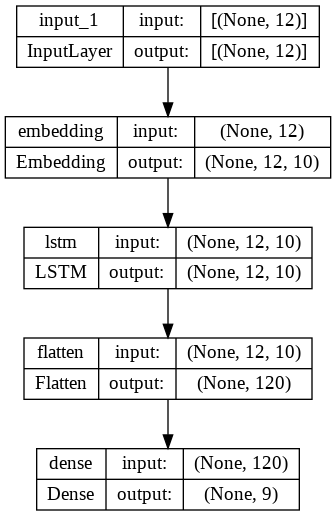

In [ ]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/Proyek Akhir/model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary() # Menampilkan Parameter Model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 embedding (Embedding)       (None, 12, 10)            850       
                                                                 
 lstm (LSTM)                 (None, 12, 10)            840       
                                                                 
 flatten (Flatten)           (None, 120)               0         
                                                                 
 dense (Dense)               (None, 9)                 1089      
                                                                 
Total params: 2,779
Trainable params: 2,779
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model (Latih Model Data)
train = model.fit(x_train, y_train, epochs=250)

Epoch 1/250
2/2 [==============================] - 3s 12ms/step - loss: 2.1949 - accuracy: 0.0333
Epoch 2/250
2/2 [==============================] - 0s 10ms/step - loss: 2.1877 - accuracy: 0.2833
Epoch 3/250
2/2 [==============================] - 0s 16ms/step - loss: 2.1804 - accuracy: 0.5667
Epoch 4/250
2/2 [==============================] - 0s 10ms/step - loss: 2.1729 - accuracy: 0.5667
Epoch 5/250
2/2 [==============================] - 0s 10ms/step - loss: 2.1649 - accuracy: 0.5833
Epoch 6/250
2/2 [==============================] - 0s 10ms/step - loss: 2.1563 - accuracy: 0.5833
Epoch 7/250
2/2 [==============================] - 0s 10ms/step - loss: 2.1463 - accuracy: 0.5667
Epoch 8/250
2/2 [==============================] - 0s 12ms/step - loss: 2.1353 - accuracy: 0.5667
Epoch 9/250
2/2 [==============================] - 0s 10ms/step - loss: 2.1228 - accuracy: 0.5333
Epoch 10/250
2/2 [==============================] - 0s 11ms/step - loss: 2.1088 - accuracy: 0.5167
Epoch 11/250
2/2 [=

# EVALUATION

Setelah menjalankan pelatihan model dengan algoritma Neural Network dan LSTM serta telah mengetahui hasil akurasi pada step terakhir. Maka, tahapan selanjutnya adalah menganalisa model dengan visualisasi plot akurasi dan loss untuk melihat hasil akurasi dari algoritma pelatihan model Neural Network dengan LSTM tersebut.

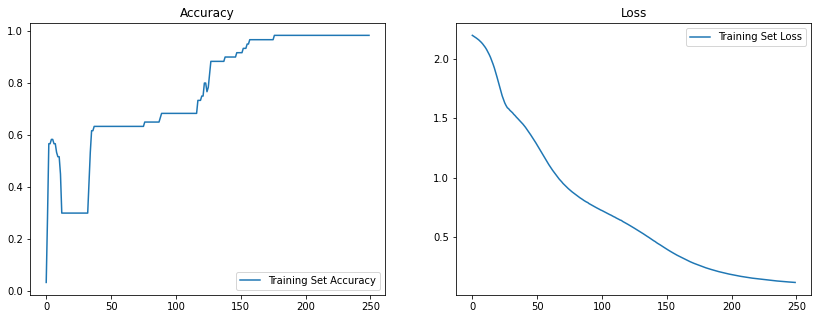

In [ ]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# DEPLOYMENT

Setelah mengetahui hasil dari akurasi dan loss pada model yang telah ditetapkan dengan algoritma Neural Network dan LSTM. Maka, tahapan selanjutnya adalah menguji atau testing pada chatbot yang telah dilatih sebelumnya dan melihat apakah sesuai atau tidak pada saat kita masukan teks kalimat pertanyaannya.

Pada pengujian ini menggunakan metode input atau masukan sesuai dengan kalimat pertanyaan yang dimasukkan.

In [ ]:
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('👨‍🦰 Kamu : ')
  
  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)


  # Mendapatkan hasil keluaran pada model 
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag dan memainkan voice bot
  response_tag = le.inverse_transform([output])[0]
  print("🤖 KadekBot : ", random.choice(responses[response_tag]))
  tts = gTTS(random.choice(responses[response_tag]), lang='id')
  # Simpan model voice bot ke dalam Google Drive
  tts.save('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir/KadekBot.wav')
  time.sleep(0.08)
  # Load model voice bot from Google Drive
  ipd.display(ipd.Audio('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir/KadekBot.wav', autoplay=True))
  print("="*60 + "\n")
  # Tambahkan respon 'pembayaran_restoran_NurvAlbiky' agar bot bisa berhenti
  if response_tag == "goodbye":
    break

👨‍🦰 Kamu : halo
1/1 [==============================] - 0s 458ms/step
🤖 KadekBot :  Halo! Welcome to Restourant NurvAlbiky, apakah mau lihat menu?



👨‍🦰 Kamu : Apa itu Restoran NurvAlbiky?
1/1 [==============================] - 0s 18ms/step
🤖 KadekBot :  Restoran NurvAlbiky adalah sebuah restoran yang bertema Timur Tengah dengan bahan utama Domba, selain Domba kami juga menyediakan menu makanan Timur Tengah lainnya. Di tambah dengan kesan interior ala Timur Tengah



👨‍🦰 Kamu : Apa tujuan didirikannya Restoran NurvAlbiky?
1/1 [==============================] - 0s 17ms/step
🤖 KadekBot :  Tujuannya adalah untuk mereka yang ingin mengetahui makanan ala Timur Tengah tanpa harus datang ke Negeri Timur Tengah.



👨‍🦰 Kamu : Apa saja menu yang ada di restoran NurvAlbiky?
1/1 [==============================] - 0s 18ms/step
🤖 KadekBot :  Menu yang kami sediakan terutama shawarma, Tabbouleh, Macthbous, Lamb Mandhi, Chicken Mandhi, Lamb Kabuli, Chicken Kabuli, Canay Bread, unutuk Minuman ada Ayran, Arabian Coffe, Safron Milk, Tamer Hindi.



👨‍🦰 Kamu : Apa menu best seller di restoran NurvAlbiky?
1/1 [==============================] - 0s 19ms/step
🤖 KadekBot :  untuk Menu best seller ada Lamb kebuli, lugaimat, shawarma, dan canay bread.



👨‍🦰 Kamu : kalo gitu saya mau pesan shawarma
1/1 [==============================] - 0s 18ms/step
🤖 KadekBot :  baik, apa ada yang mau tambah lagi?



👨‍🦰 Kamu : saya mau pesan coklat unta dan esh asarya, safron milk, tamer hindi
1/1 [==============================] - 0s 19ms/step
🤖 KadekBot :  baik, ditunggu ya nanti pesanannya saya antar



👨‍🦰 Kamu : bayar bisa melalui apa saja
1/1 [==============================] - 0s 17ms/step
🤖 KadekBot :  untuk pembayaran bisa cash, atau dapat menggunakan kartu debit dan e-wallet.



👨‍🦰 Kamu : ok
1/1 [==============================] - 0s 17ms/step
🤖 KadekBot :  Dadahh!


## Save The Model
Setelah pengujian Chatbot telah disesuaikan dengan kalimat dan jawabannya. Maka, model chatbot bisa disimpan dengan format .h5 atau .pkl (pickle) untuk penggunaan aplikasi AI Chatbot dengan website atau sistem Android. Penyimpanan file model bisa langsung secara transient atau bisa taruh di Google Drive.

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks//Proyek Akhir/chat_model.h5')

print('Model Created Successfully!')

Model Created Successfully!
